##########################################

# **MODIS TERRA NDVI TIMESERIES**

##########################################

# 1. Introduction

This notebook will guide you trought the process of requesting MODIS TERRA data and how to retrieve and calculate NDVI values and anomalies throughout a specific time period.

Notebook outline: 

- [1. Introduction](#1.-Introduction)
- [2. Import libraries](#2.-Import-libraries)
- [3. Explore online MODIS portal](#3.-Explore-online-MODIS-portal)
- [4. Retrieve NDVI](#4.-Retrieve-NDVI)
- [5. Plot timeseries](#5.-Plot-timeseries)
- [6. Calculate anomaly](#6.-Calculate-anomaly)
- [7. Plot anomaly](#7.-Plot-anomaly)

# 2. Import libraries 

In this notebook we are going to request data from NASA's MODIS TERRA mission using the following url:
"https://modis.ornl.gov/rst/api/v1/"

To request the data and preprocess the data the following packages are needed:

In [1]:
import requests
import json
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# url information for modis online portal 
url = "https://modis.ornl.gov/rst/api/v1/"
header = {'Accept': 'application/json'} # Use following for a csv response: header = {'Accept': 'text/csv'}

# 3. Explore online MODIS portal

An online portal usually consists of multiple layers: product, bands, dates...
In order to retrieve relevant information, we need to explore whichs products are available.
A request is made to get an overview of the products:

In [2]:
# Request the products available on the online portal
response = requests.get('https://modis.ornl.gov/rst/api/v1/products?', headers=header)
products = json.loads(response.text)['products']

workspaces=pd.DataFrame.from_dict(products) #convert response body to DataFrame object
workspaces

,product,description,frequency,resolution_meters
0,Daymet,Daily Surface Weather Data (Daymet) on a 1-km ...,Daily,1000
1,ECO4ESIPTJPL,ECOSTRESS Evaporative Stress Index PT-JPL (ESI...,Varies,70
2,ECO4WUE,ECOSTRESS Water Use Efficiency (WUE) Daily L4 ...,Varies,70
3,GEDI03,GEDI Gridded Land Surface Metrics (LSM) L3 1km...,One-time,1000
4,GEDI04_B,GEDI Gridded Aboveground Biomass Density (AGBD...,One-time,1000
5,MCD12Q1,MODIS/Terra+Aqua Land Cover Type (LC) Yearly L...,Yearly,500
6,MCD12Q2,MODIS/Terra+Aqua Land Cover Dynamics (LCD) Yea...,Yearly,500
7,MCD15A2H,MODIS/Terra+Aqua Leaf Area Index/FPAR (LAI/FPA...,8-Day,500
8,MCD15A3H,MODIS/Terra+Aqua Leaf Area Index/FPAR (LAI/FPA...,4-Day,500
9,MCD19A3,MODIS/Terra+Aqua BRDF Model Parameters (MAIAC)...,8-Day,1000


As we are interested in the NDVI, choose the product which holds information about vegetation indides and explore which bands are available by making a second request:

In [3]:
product = 'MOD13Q1'
response = requests.get(f'https://modis.ornl.gov/rst/api/v1/{product}/bands?', headers=header)
bands = json.loads(response.text)['bands']

modis_bands=pd.DataFrame.from_dict(bands) #convert response body to DataFrame object
scale = float(modis_bands.scale_factor[modis_bands.band == '250m_16_days_NDVI'])
modis_bands

,band,description,units,valid_range,fill_value,scale_factor,add_offset
0,250m_16_days_blue_reflectance,Surface Reflectance Band 3,reflectance,0 to 10000,-1000,0.0001,0
1,250m_16_days_composite_day_of_the_year,Day of year VI pixel,Julian day of the year,1 to 366,-1,NaN,NaN
2,250m_16_days_EVI,16 day EVI average,EVI ratio - No units,-2000 to 10000,-3000,0.0001,0
3,250m_16_days_MIR_reflectance,Surface Reflectance Band 7,reflectance,0 to 10000,-1000,0.0001,0
4,250m_16_days_NDVI,16 day NDVI average,NDVI ratio - No units,-2000 to 10000,-3000,0.0001,0
5,250m_16_days_NIR_reflectance,Surface Reflectance Band 2,reflectance,0 to 10000,-1000,0.0001,0
6,250m_16_days_pixel_reliability,Quality reliability of VI pixel,rank,0 to 3,-1,NaN,NaN
7,250m_16_days_red_reflectance,Surface Reflectance Band 1,reflectance,0 to 10000,-1000,0.0001,0
8,250m_16_days_relative_azimuth_angle,Relative azimuth angle of VI pixel,degrees,-3600 to 3600,-4000,0.1,0
9,250m_16_days_sun_zenith_angle,Sun zenith angle of VI pixel,degrees,-9000 to 9000,-10000,0.01,0


We want to create a timeseries. Therefore it is useful to know at which timesteps the NDVI is calculated:

In [8]:
product = 'MOD13Q1'
band = '250m_16_days_NDVI'
lat = str(10.690)
lon = str(40.766)
response = requests.get(f'https://modis.ornl.gov/rst/api/v1/{product}/dates?band={band}&latitude={lat}&longitude={lon}', headers=header)
dates = json.loads(response.text)['dates']

modis_dates = [i['modis_date'] for i in dates]
calendar_dates = [i['calendar_date'] for i in dates]
dates[:20] # show first 20

[{'modis_date': 'A2000049', 'calendar_date': '2000-02-18'},
 {'modis_date': 'A2000065', 'calendar_date': '2000-03-05'},
 {'modis_date': 'A2000081', 'calendar_date': '2000-03-21'},
 {'modis_date': 'A2000097', 'calendar_date': '2000-04-06'},
 {'modis_date': 'A2000113', 'calendar_date': '2000-04-22'},
 {'modis_date': 'A2000129', 'calendar_date': '2000-05-08'},
 {'modis_date': 'A2000145', 'calendar_date': '2000-05-24'},
 {'modis_date': 'A2000161', 'calendar_date': '2000-06-09'},
 {'modis_date': 'A2000177', 'calendar_date': '2000-06-25'},
 {'modis_date': 'A2000193', 'calendar_date': '2000-07-11'},
 {'modis_date': 'A2000209', 'calendar_date': '2000-07-27'},
 {'modis_date': 'A2000225', 'calendar_date': '2000-08-12'},
 {'modis_date': 'A2000241', 'calendar_date': '2000-08-28'},
 {'modis_date': 'A2000257', 'calendar_date': '2000-09-13'},
 {'modis_date': 'A2000273', 'calendar_date': '2000-09-29'},
 {'modis_date': 'A2000289', 'calendar_date': '2000-10-15'},
 {'modis_date': 'A2000305', 'calendar_da

# 4. Retrieve NDVI

As we are only interested in a small area and/or a specific time period, the data will be requested throught the subset module. This subset module only allows for 10 extractions. If you want a timeseries exceeding 10 instances, a for loop should be created, looping over the (modis)dates of interest:

In [11]:
# If you are interested in only a specific timeperiod, you can make a subset of the modis dates. E.g., the following line takes the last 200 timesteps. (uncomment to run)
# dates_subset = modis_dates[modis_dates.index(modis_dates[-1])-200:modis_dates.index(modis_dates[-1])]

Now let's have a look at how to download the timeseries from modis, for our specific point.

Depending on your PC's capabilities, the following cell may take around 20 minutes to run...
Unless you want to alter the timeperiod or location, the following two cells can be skipped as the corresponding NDVI timeseries is already available as a csv in the datafolder.

In [ ]:
# Initialize lists to store the data
data_ndvi = []
product = 'MOD13Q1'
band = '250m_16_days_NDVI'
lat = 10.690
lon = 40.766
above_below = 0  # km above and below pixel
left_right = 0 # km above and below pixel

# Iterate through the list of dates and submit subset requests for each date:
for dt in modis_dates:
    
    # Join request parameters to URL string and submit request
    ndvi_response = requests.get("".join([
        url, product, "/subset?",
        "latitude=", str(lat),
        "&longitude=", str(lon),
        "&band=", band,
        "&startDate=", dt,
        "&endDate=", dt,
        "&kmAboveBelow=", str(above_below),
        "&kmLeftRight=", str(left_right)
    ]), headers=header)

    # Append subset data to lstdata
    data_ndvi.append( json.loads(ndvi_response.text)['subset'][0]['data'] )

Convert the data into a dataframe for easier processing. As an index we use the converted datetime (Modis to real datetime format). Don't forget to multiply the ndvi values with the scale factor (given in the metadata of the band).

In [ ]:
dates = [(datetime.datetime(int(date[1:5]), 1, 1) + datetime.timedelta(int(date[5:]))).strftime('%Y-%m-%d') for date in modis_dates]
dates_dt = pd.to_datetime(dates)

data_ndvi = pd.DataFrame(data_ndvi, index=dates_dt) # make data frame of the NDVI values with date as index
data_ndvi.columns = ['NDVI'] # give the clumn a name
data_ndvi.NDVI = data_ndvi.NDVI*scale # multiply the NDVI values with the scale factor
data_ndvi

Import the NDVI timeseries using the module pd.read_csv

In [12]:
data_ndvi = pd.read_csv('NDVI_timeseries.csv',parse_dates=['date'],index_col=['date'])
data_ndvi

,NDVI
date,
2000-02-19,0.1348
2000-03-06,0.1294
2000-03-22,0.1361
2000-04-07,0.1399
2000-04-23,0.1369
...,...
2022-05-10,0.1488
2022-05-26,0.1425
2022-06-11,0.1547


# 5. Plot timeseries

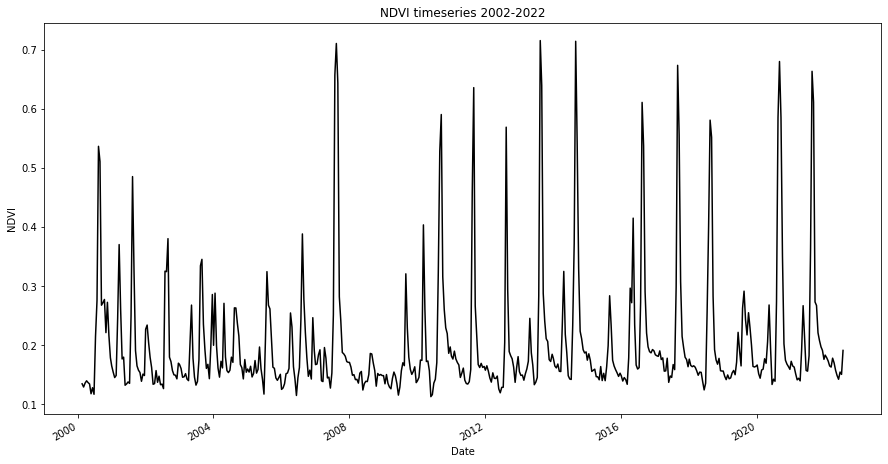

In [13]:
plt.rcParams['figure.figsize'] = (15,8)

fig, ax1 = plt.subplots()

ax1.set_xlabel('Date')
ax1.set_ylabel('NDVI')
ax1.plot(data_ndvi.index, data_ndvi.NDVI, 'k-')
ax1.tick_params(axis='y')
ax1.set_title('NDVI timeseries 2002-2022')
fig.autofmt_xdate()

plt.show()

# 6. Calculate anomaly

In order to create monthly standardized anomalies, NDVI is averaged over each month and and compared with other years. The theorie can be found in ppt 6.2_2 slide 26.

First we need to convert our data frame to monthly averages. As our index has a datetime format wa can easily select all the NDVI values from one month using the following command:

In [14]:
# For example: NDVI values for November 2013:
data_ndvi.loc['2013-11']

,NDVI
date,
2013-11-02,0.2065
2013-11-18,0.1757


Calculate the mean NDVI over each month, to get a monthly timeseries

In [15]:
NDVI_monthly2 = data_ndvi.resample('M').mean()
NDVI_monthly2.index = pd.to_datetime(NDVI_monthly2.index)
NDVI_monthly2['month'] = [datetime.datetime.strftime(date, '%m') for date in NDVI_monthly2.index]

Keep only one instance of each month and calculate the mean and standard deveation for each month

In [18]:
months = NDVI_monthly2.month.drop_duplicates()
mean = []
std = []

for month in months:
    mean.append(np.mean(NDVI_monthly2.NDVI[NDVI_monthly2.month == month]))
    std.append(np.std(NDVI_monthly2.NDVI[NDVI_monthly2.month == month]))

NDVI_month_stat = pd.DataFrame()
NDVI_month_stat['month'] = months
NDVI_month_stat['NDVI_mean'] =mean
NDVI_month_stat['NDVI_std'] = std

Create a function to calculate the anomaly:

In [19]:
# anomaly 
def anomaly(value, month, stats):
    i = 0
    while month != stats.month[i]:
        i = i+1
    else:
        return_value = (value - stats.NDVI_mean[i])/stats.NDVI_std[i]
    return return_value

In [20]:
anomaly_list = []

for l in range(len(NDVI_monthly2)):
    anomaly_list.append(anomaly(NDVI_monthly2.NDVI[l], NDVI_monthly2.month[l],NDVI_month_stat))

NDVI_anom = NDVI_monthly2.copy()
NDVI_anom['NDVI_anom'] = anomaly_list
NDVI_anom


,NDVI,month,NDVI_anom
date,,,
2000-02-29,0.13480,02,-1.522315
2000-03-31,0.13275,03,-0.723077
2000-04-30,0.13840,04,-0.996500
2000-05-31,0.12625,05,-1.001148
2000-06-30,0.12265,06,-1.072208
...,...,...,...
2022-03-31,0.17065,03,0.056522
2022-04-30,0.16395,04,-0.384467
2022-05-31,0.14565,05,-0.569396


# 7. Plot anomaly

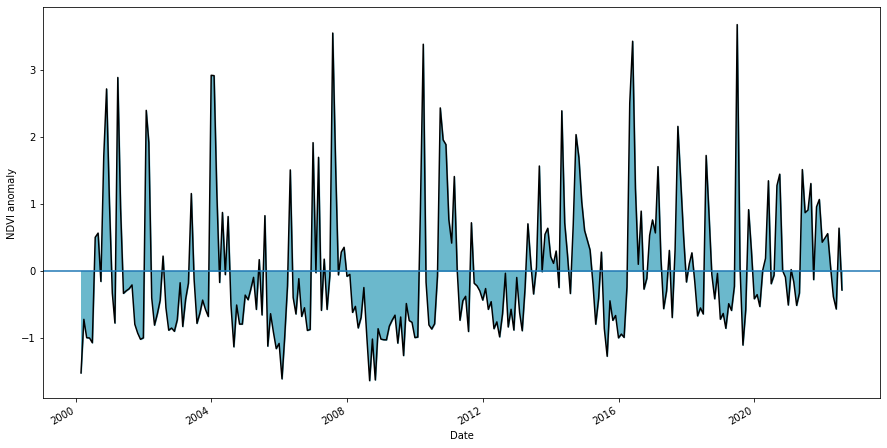

In [21]:
plt.rcParams['figure.figsize'] = (15,8)

fig, ax1 = plt.subplots()

ax1.set_xlabel('Date')
ax1.set_ylabel('NDVI anomaly')
ax1.plot(NDVI_anom.index, NDVI_anom.NDVI_anom, 'k-')
ax1.tick_params(axis='y')
ax1.axhline(y=0)
ax1.fill_between(NDVI_anom.index, NDVI_anom.NDVI_anom, color = '#6bb8cc')
fig.autofmt_xdate()

plt.show()